In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [161]:
smaple = pd.read_csv('/Users/jjong/desktop/vscode/kaggle_src/house-prices/sample_submission.csv')
test = pd.read_csv('/Users/jjong/desktop/vscode/kaggle_src/house-prices/test.csv')
train = pd.read_csv('/Users/jjong/desktop/vscode/kaggle_src/house-prices/train.csv')
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [162]:
train.shape, test.shape

((1460, 81), (1459, 80))

In [163]:
conbine = pd.concat([train, test], axis=0)
conbine

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN


In [164]:
conbine.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallCond  

In [165]:
conbine.drop(['Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], axis=1, inplace=True)

In [166]:
df1 = conbine.iloc[:1460]
df2 = conbine.iloc[1460:].drop('SalePrice', axis=1)

In [169]:
df1 = df1.dropna()
y = df1['SalePrice']
df1

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,175000.0
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2010,WD,Normal,210000.0
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2500,5,2010,WD,Normal,266500.0
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,112,0,0,0,0,4,2010,WD,Normal,142125.0


In [170]:
df2 = df2.dropna()
df2

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,120,0,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,...,34,0,0,0,0,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,...,36,0,0,0,0,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,...,82,0,0,144,0,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,2912,20,RL,80.0,13384,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,5,2006,WD,Normal
1452,2913,160,RM,21.0,1533,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,12,2006,WD,Abnorml
1455,2916,160,RM,21.0,1894,Pave,Reg,Lvl,AllPub,Inside,...,24,0,0,0,0,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,9,2006,WD,Abnorml


In [171]:
obj = df1.select_dtypes('object')
inte = df1[df1.columns[df1.dtypes != 'object']]

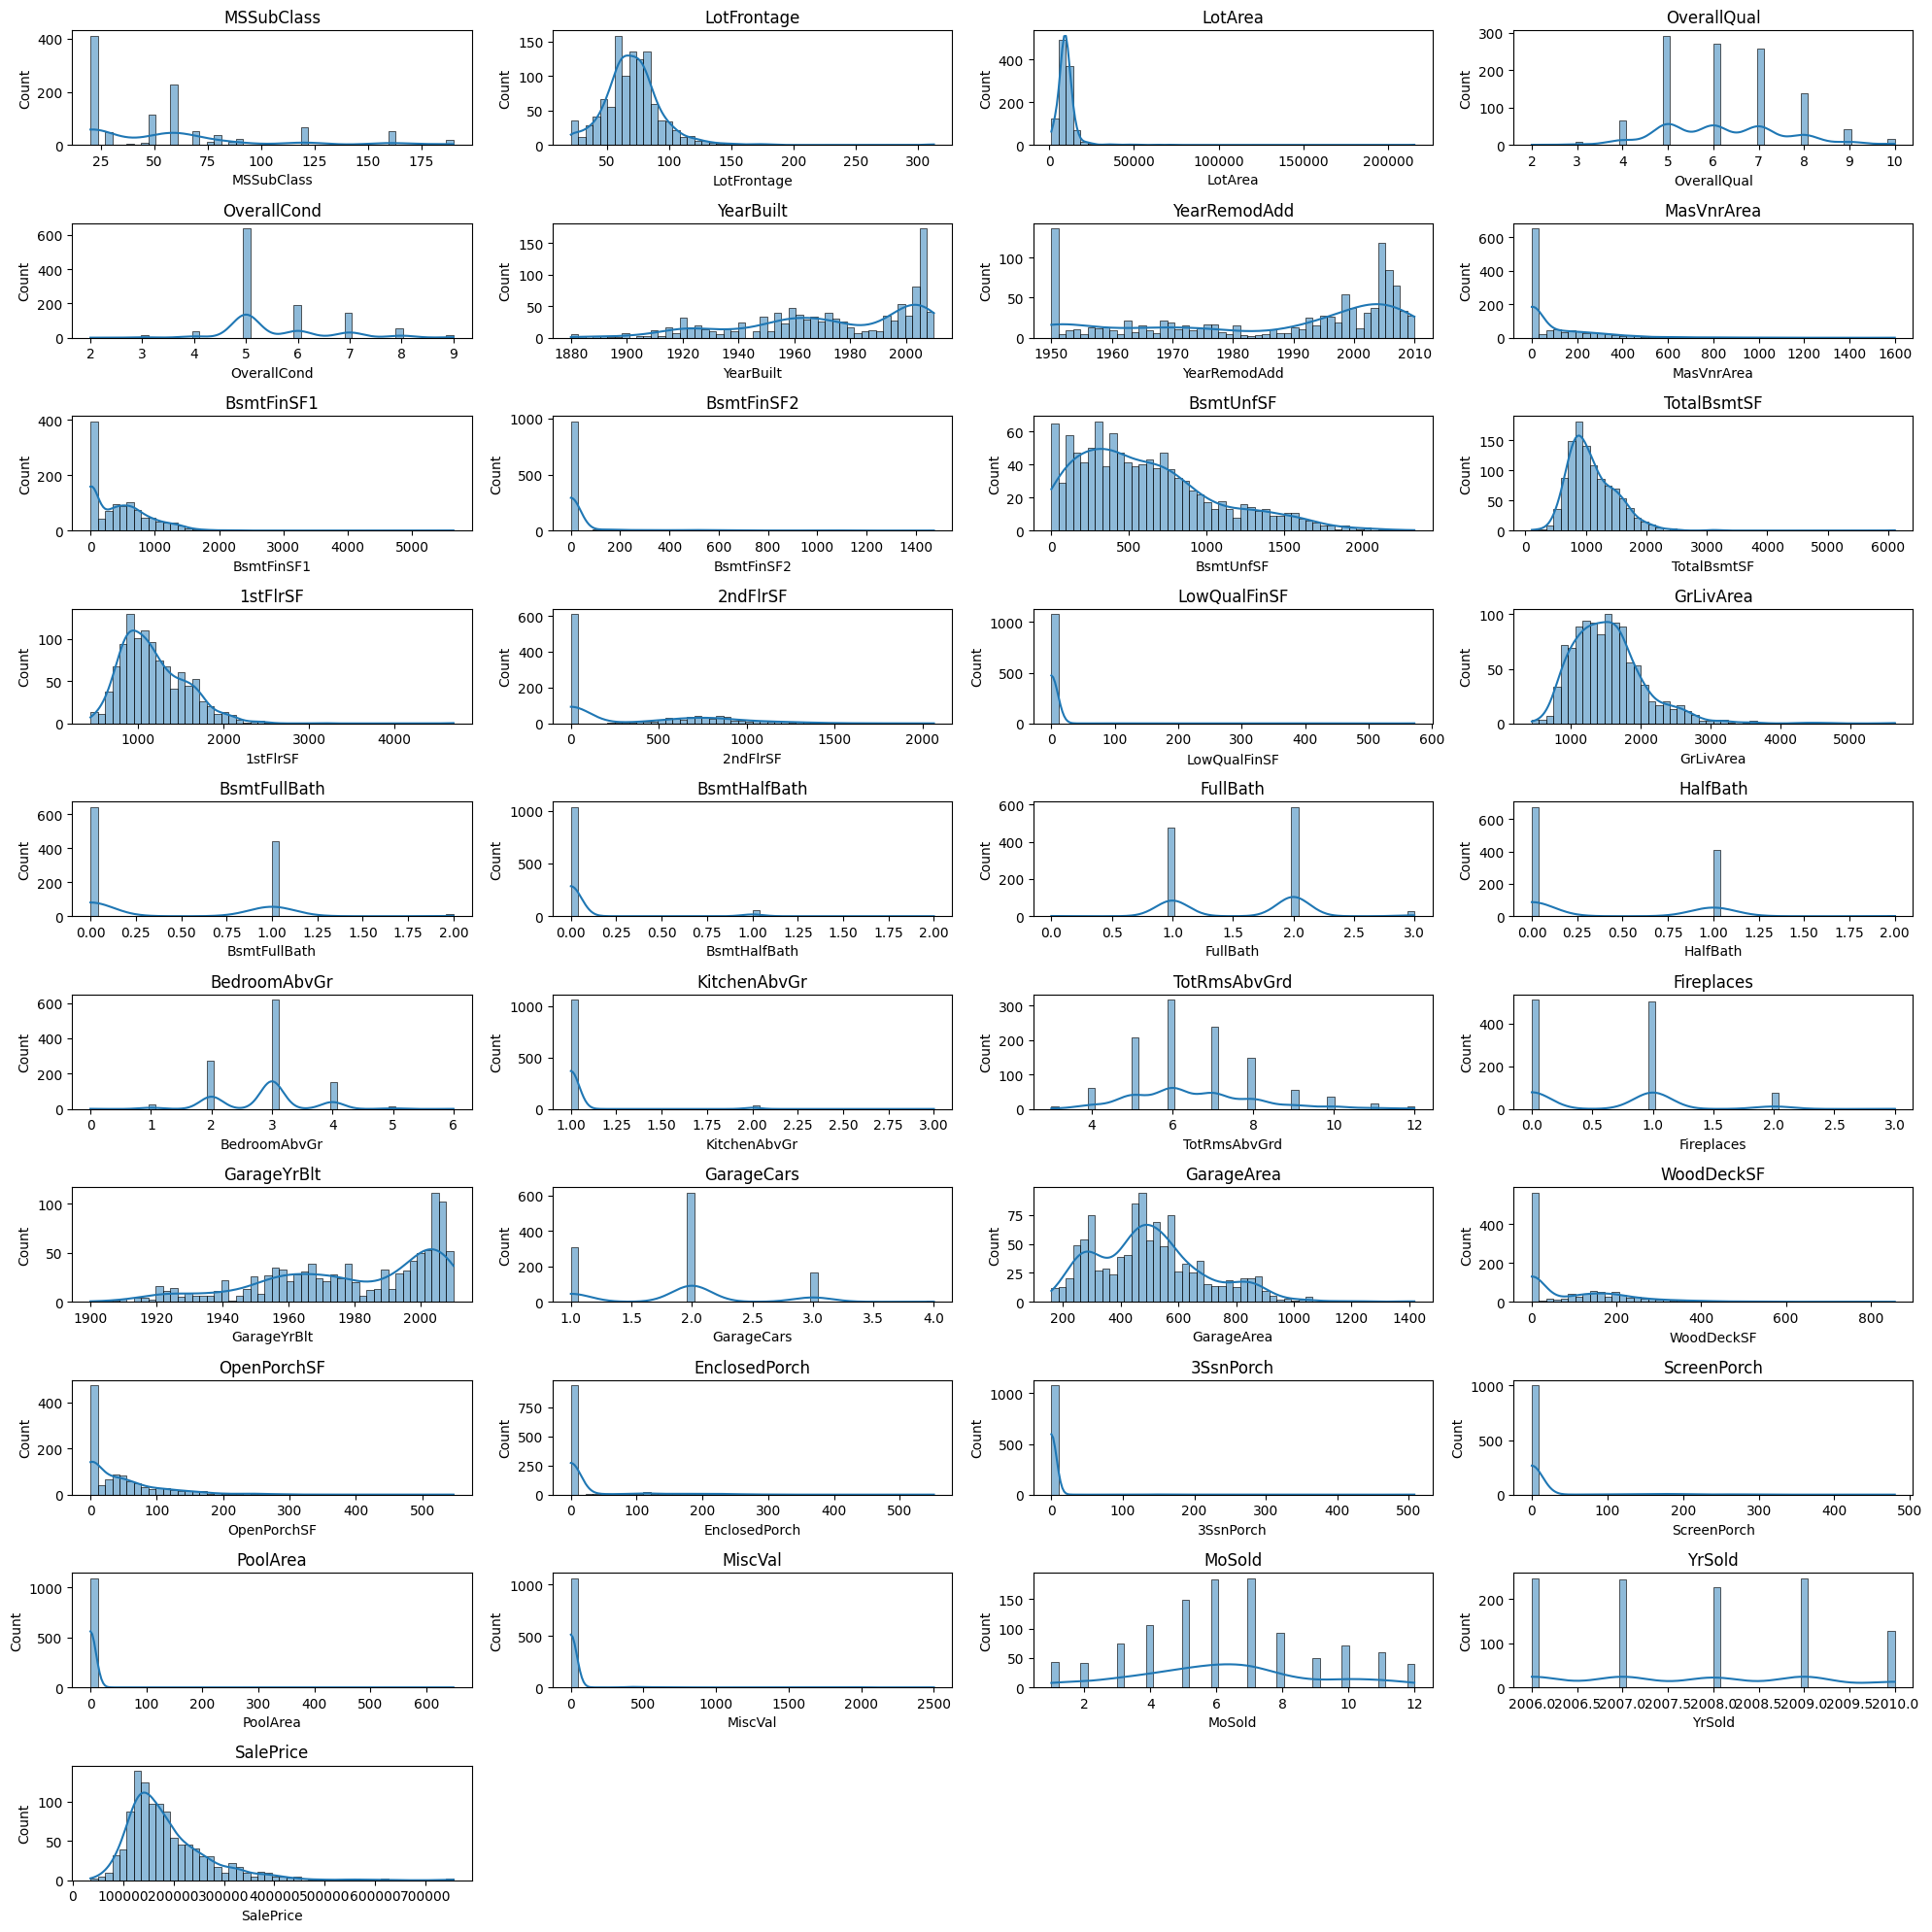

In [172]:
plt.figure(figsize=(20, 20))
for i in range(len(inte.columns[1:])):
    plt.subplot(10, 4, i+1)
    sns.histplot(inte[inte.columns[i+1]], kde=True, bins=50)
    plt.title(inte.columns[i+1])
plt.tight_layout()
plt.show()

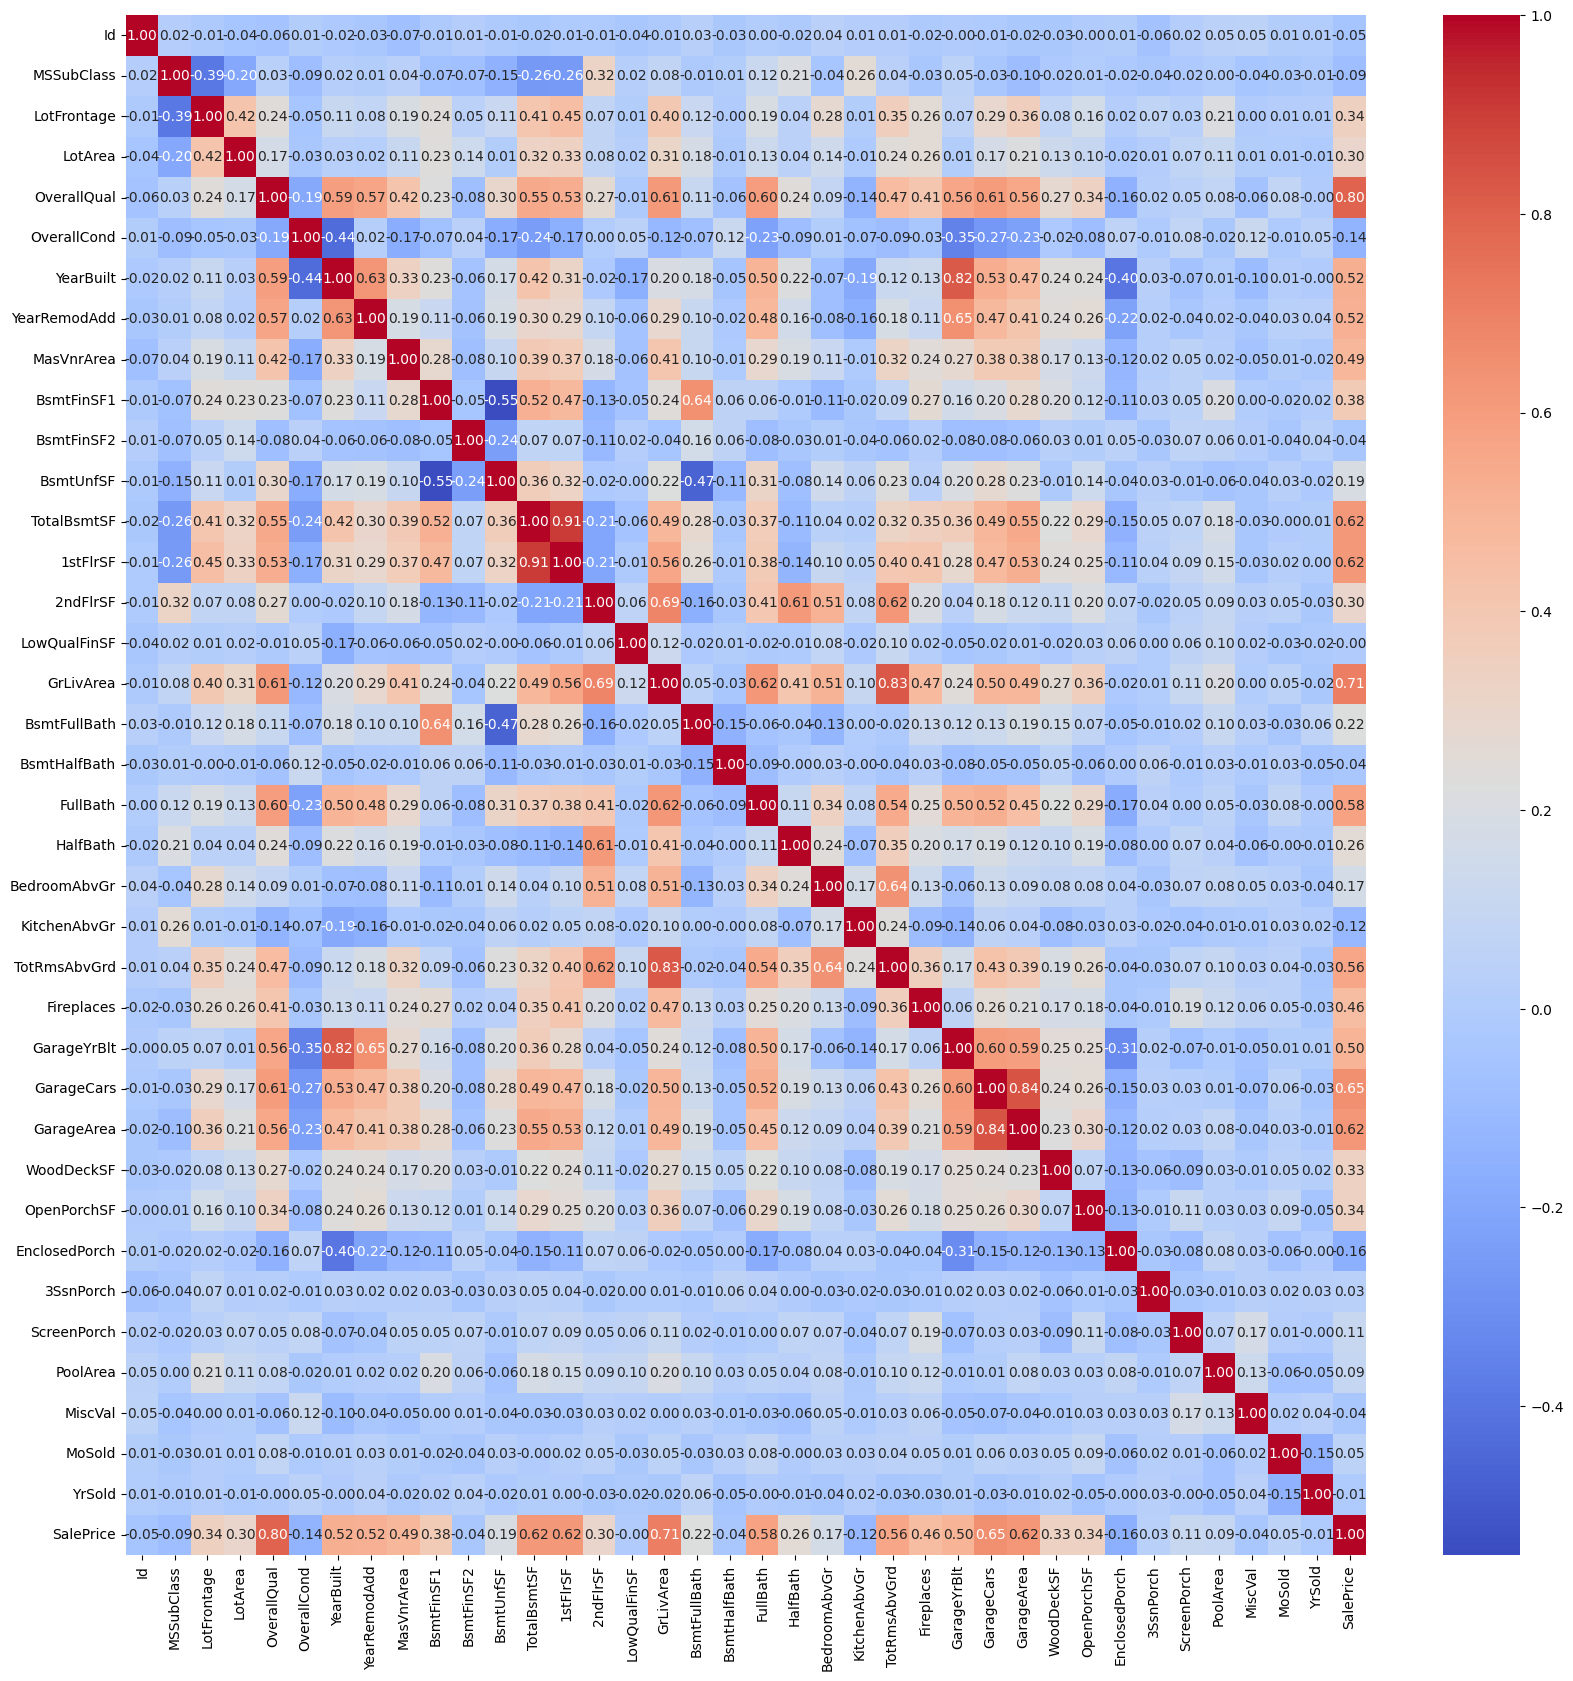

In [102]:
plt.figure(figsize=(20,20))
sns.heatmap(df1.corr(numeric_only=True), annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

In [108]:
tmp = inte.corr()
tmp['SalePrice'].abs().sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.795437
GrLivArea        0.707481
GarageCars       0.652103
GarageArea       0.620772
TotalBsmtSF      0.617741
1stFlrSF         0.617692
FullBath         0.578299
TotRmsAbvGrd     0.560521
YearBuilt        0.523434
YearRemodAdd     0.519806
GarageYrBlt      0.502248
MasVnrArea       0.485409
Fireplaces       0.458182
BsmtFinSF1       0.378678
LotFrontage      0.343978
OpenPorchSF      0.338600
WoodDeckSF       0.330286
2ndFlrSF         0.302569
LotArea          0.302268
HalfBath         0.259469
BsmtFullBath     0.223948
BsmtUnfSF        0.191247
BedroomAbvGr     0.168489
EnclosedPorch    0.161711
OverallCond      0.138511
KitchenAbvGr     0.115382
ScreenPorch      0.106479
PoolArea         0.092085
MSSubClass       0.089478
MoSold           0.052584
Id               0.047595
BsmtHalfBath     0.041341
BsmtFinSF2       0.036923
MiscVal          0.036001
3SsnPorch        0.033947
YrSold           0.006723
LowQualFinSF     0.003541
Name: SalePr

C:\Users\jjong\AppData\Local\Temp\ipykernel_10560\2196794224.py:2: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x='OverallQual', y='SalePrice', data=inte, jitter=True, dodge=True, palette='Set2', ax=ax[0])


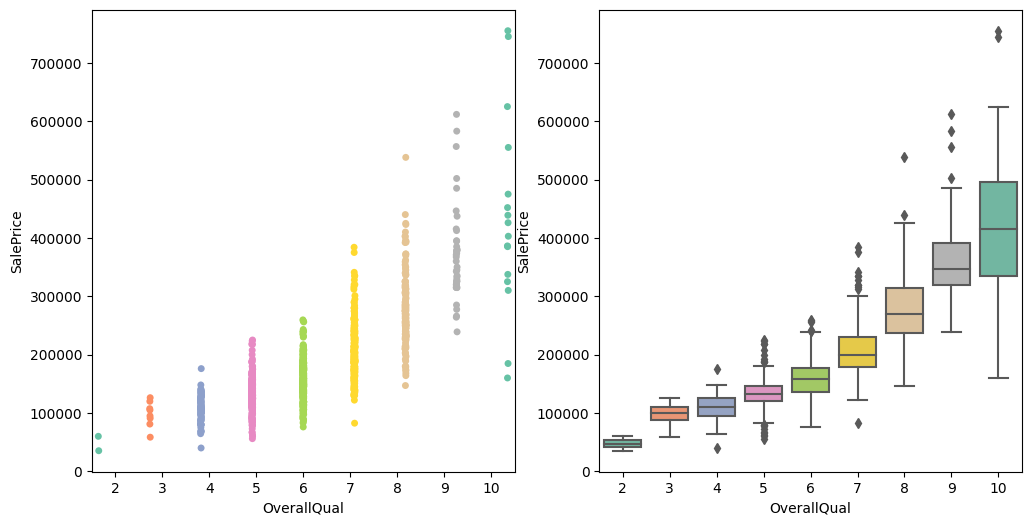

In [136]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.stripplot(x='OverallQual', y='SalePrice', data=inte, jitter=True, dodge=True, palette='Set2', ax=ax[0])
sns.boxplot(x='OverallQual', y='SalePrice', data=inte, palette='Set2', ax=ax[1])
plt.show()

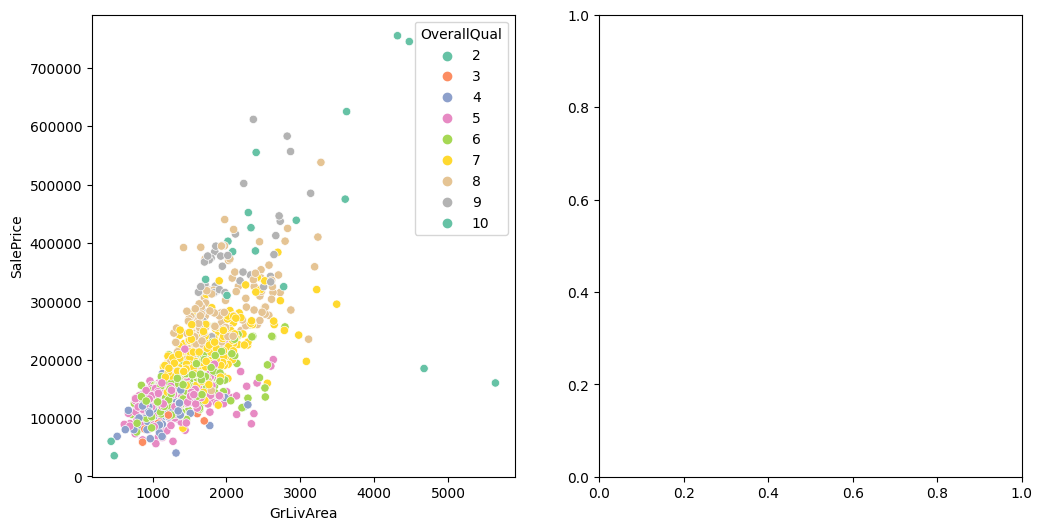

In [140]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.scatterplot(x='GrLivArea', y='SalePrice', data=df1, hue='OverallQual', palette='Set2', ax=ax[0])
plt.show()

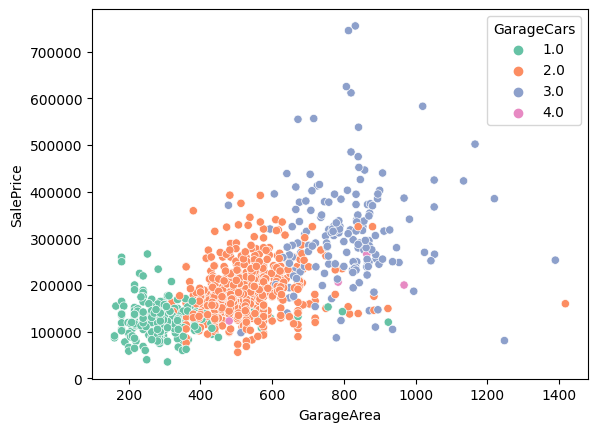

In [131]:
plt.figure()
sns.scatterplot(x='GarageArea', y='SalePrice', data=df1, hue='GarageCars', palette='Set2')
plt.show()

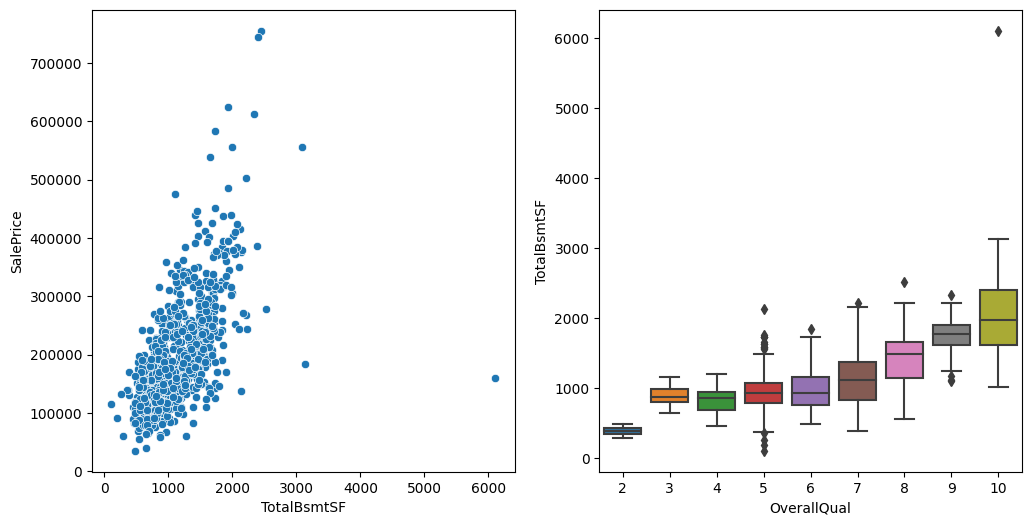

In [135]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.scatterplot(x='TotalBsmtSF', y='SalePrice', data=df1,ax=ax[0])
sns.boxplot(x='OverallQual', y='TotalBsmtSF', data=df1,ax=ax[1])
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for column in obj.columns:
    obj[column] = le.fit_transform(obj[column])
obj_y = pd.concat([obj, y], axis=1)
obj_y

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,SalePrice
0,3,1,3,3,0,4,0,5,2,2,...,2,5,1,1,4,4,2,8,4,208500.0
1,3,1,3,3,0,2,0,24,1,2,...,3,5,1,1,4,4,2,8,4,181500.0
2,3,1,0,3,0,4,0,5,2,2,...,2,5,1,1,4,4,2,8,4,223500.0
3,3,1,0,3,0,0,0,6,2,2,...,2,5,5,2,4,4,2,8,0,140000.0
4,3,1,0,3,0,2,0,15,2,2,...,2,5,1,1,4,4,2,8,4,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,3,1,3,3,0,4,0,8,2,2,...,3,5,1,1,4,4,2,8,4,175000.0
1456,3,1,3,3,0,4,0,14,2,2,...,3,2,1,2,4,4,2,8,4,210000.0
1457,3,1,3,3,0,4,0,6,2,2,...,2,5,1,1,4,4,2,8,4,266500.0
1458,3,1,3,3,0,4,0,12,2,2,...,2,5,1,2,4,4,2,8,4,142125.0


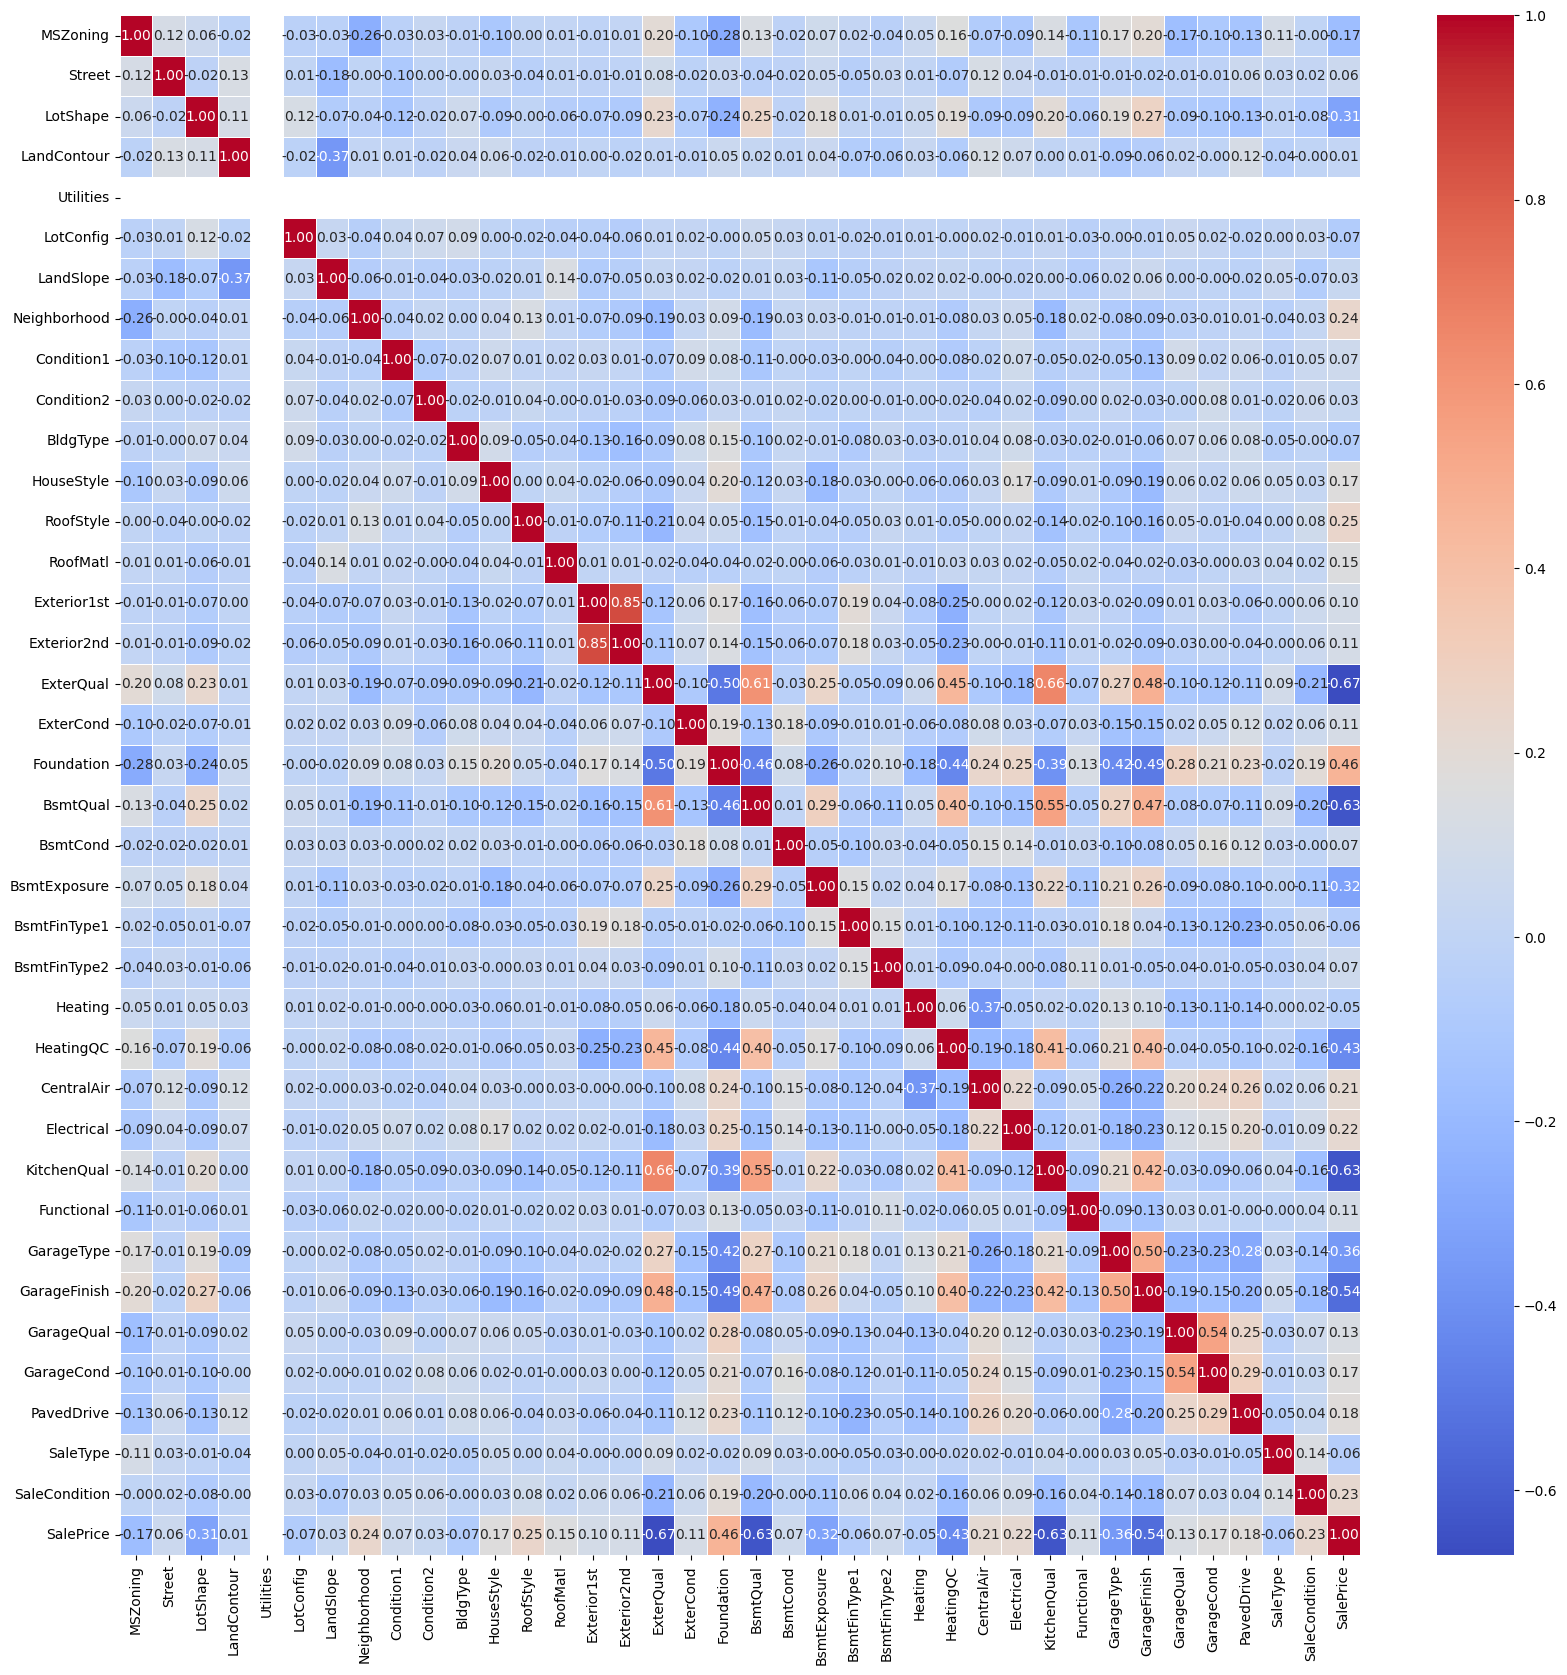

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(obj_y.corr(),annot=True, fmt='.2f', cmap='coolwarm',linewidths=0.5)
plt.show()

C:\Users\jjong\AppData\Local\Temp\ipykernel_10560\1841424979.py:2: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x='ExterQual', y='SalePrice', data=obj_y, jitter=True, dodge=True, palette='Set2', ax=ax[0])


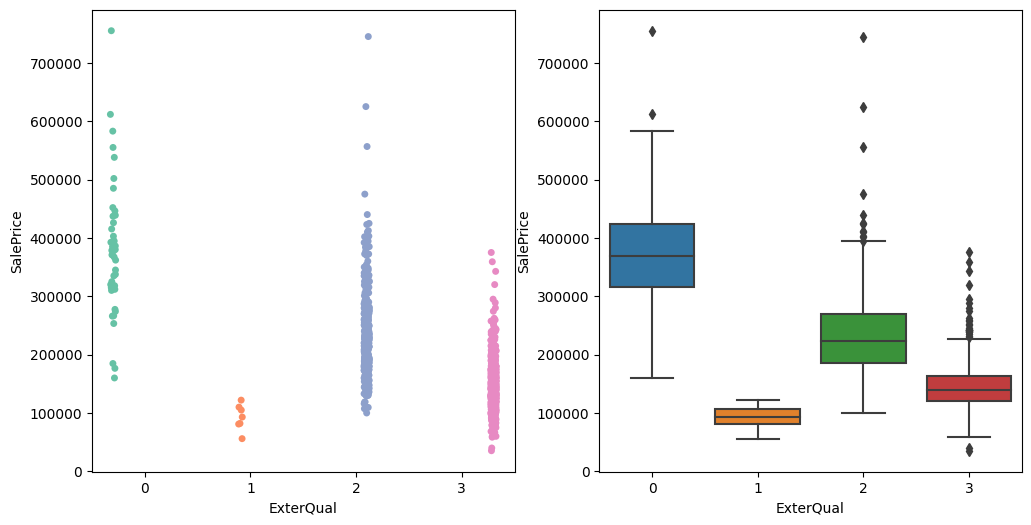

In [177]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.stripplot(x='ExterQual', y='SalePrice', data=obj_y, jitter=True, dodge=True, palette='Set2', ax=ax[0])
sns.boxplot(x='ExterQual', y='SalePrice', data=obj_y, ax=ax[1])
plt.show()